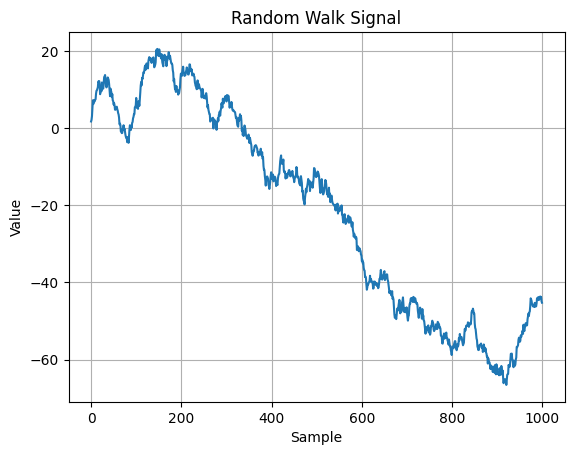

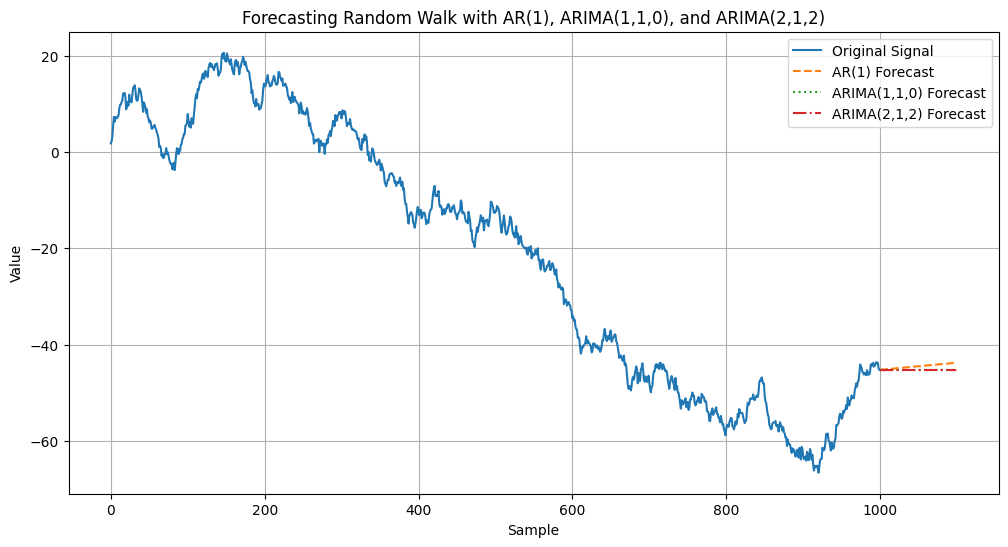

AR(1) MAE: 46.65168230702142
ARIMA(1,1,0) MAE: 47.40098306158058
ARIMA(2,1,2) MAE: 47.428066019106694


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# 1. Create a random walk signal (non-stationary)
N = 1000
np.random.seed(0)  # For reproducibility
random_walk = np.cumsum(np.random.normal(0, 1, N))  # Cumulative sum to simulate random walk

# Plot the random walk
plt.plot(random_walk)
plt.title("Random Walk Signal")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 2. Fit AR(1), ARIMA(1,1,0), and ARIMA(2,1,2) models on the random walk signal

# AR(1) model
ar1_model = ARIMA(random_walk, order=(1, 0, 0))  # AR(1)
ar1_result = ar1_model.fit()

# ARIMA(1,1,0) model
arima_1_1_0_model = ARIMA(random_walk, order=(1, 1, 0))  # ARIMA(1,1,0)
arima_1_1_0_result = arima_1_1_0_model.fit()

# ARIMA(2,1,2) model
arima_2_1_2_model = ARIMA(random_walk, order=(2, 1, 2))  # ARIMA(2,1,2)
arima_2_1_2_result = arima_2_1_2_model.fit()

# 3. Forecast future values
forecast_steps = 100  # Forecasting the next 100 points

# AR(1) forecast
ar1_forecast = ar1_result.forecast(steps=forecast_steps)

# ARIMA(1,1,0) forecast
arima_1_1_0_forecast = arima_1_1_0_result.forecast(steps=forecast_steps)

# ARIMA(2,1,2) forecast
arima_2_1_2_forecast = arima_2_1_2_result.forecast(steps=forecast_steps)

# 4. Plot the original signal and forecasts
plt.figure(figsize=(12, 6))
plt.plot(random_walk, label="Original Signal")
plt.plot(range(N, N + forecast_steps), ar1_forecast, label="AR(1) Forecast", linestyle='--')
plt.plot(range(N, N + forecast_steps), arima_1_1_0_forecast, label="ARIMA(1,1,0) Forecast", linestyle=':')
plt.plot(range(N, N + forecast_steps), arima_2_1_2_forecast, label="ARIMA(2,1,2) Forecast", linestyle='-.')

plt.title("Forecasting Random Walk with AR(1), ARIMA(1,1,0), and ARIMA(2,1,2)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# 5. Calculate forecast accuracy (Mean Absolute Error)
# We will compare the forecasted values with the true future values (simulated as random walk continuation)
true_future_values = np.cumsum(np.random.normal(0, 1, forecast_steps))  # Simulated next 100 steps of random walk

# Calculate MAE for each model
ar1_mae = mean_absolute_error(true_future_values, ar1_forecast)
arima_1_1_0_mae = mean_absolute_error(true_future_values, arima_1_1_0_forecast)
arima_2_1_2_mae = mean_absolute_error(true_future_values, arima_2_1_2_forecast)

print(f"AR(1) MAE: {ar1_mae}")
print(f"ARIMA(1,1,0) MAE: {arima_1_1_0_mae}")
print(f"ARIMA(2,1,2) MAE: {arima_2_1_2_mae}")
